In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz
from scipy import optimize,interpolate
import seaborn as sns

<AxesSubplot:xlabel='Intensity', ylabel='Count'>

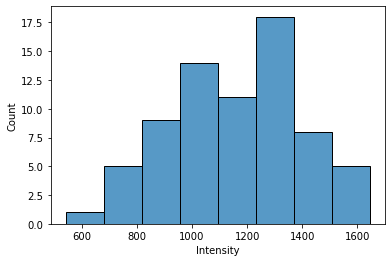

In [2]:
mappa=pd.read_csv('intensity.txt')
x = mappa.Intensity
sns.histplot(x)

The mean value is 1148.0671830985918 the minimum value is 541.65 the maximum value is 1646.27
Fit parameters of the beta distribution are: sigma 394.78599519724565 and mu 1348.4417729908364


C:\Users\Arianna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


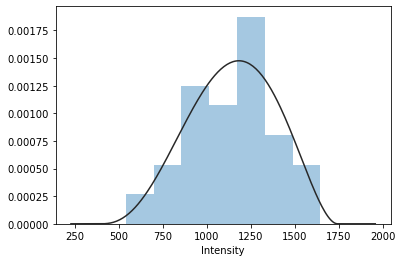

In [9]:
from scipy import stats

sns.distplot(x, kde=False, fit=stats.beta);
mu = stats.beta.fit(x)

print('The mean value is',x.mean(),'the minimum value is', x.min(),'the maximum value is', x.max())
print ('Fit parameters of the beta distribution are: sigma',mu[2],'and mu', mu[3])

#to check the formula: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html

The mean value is 1148.0671830985918 the minimum value is 541.65 the maximum value is 1646.27
Fit parameters of the Gaussian distribution are: sigma 242.29621083795612 and mu 1148.0671830985914


C:\Users\Arianna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


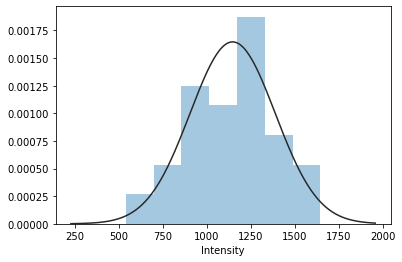

In [8]:
from scipy import stats

sns.distplot(x, kde=False, fit=stats.norm);
mu = stats.norm.fit(x)

print('The mean value is',x.mean(),'the minimum value is', x.min(),'the maximum value is', x.max())
print ('Fit parameters of the Gaussian distribution are: sigma',mu[1],'and mu', mu[0])

#to check the formula: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html

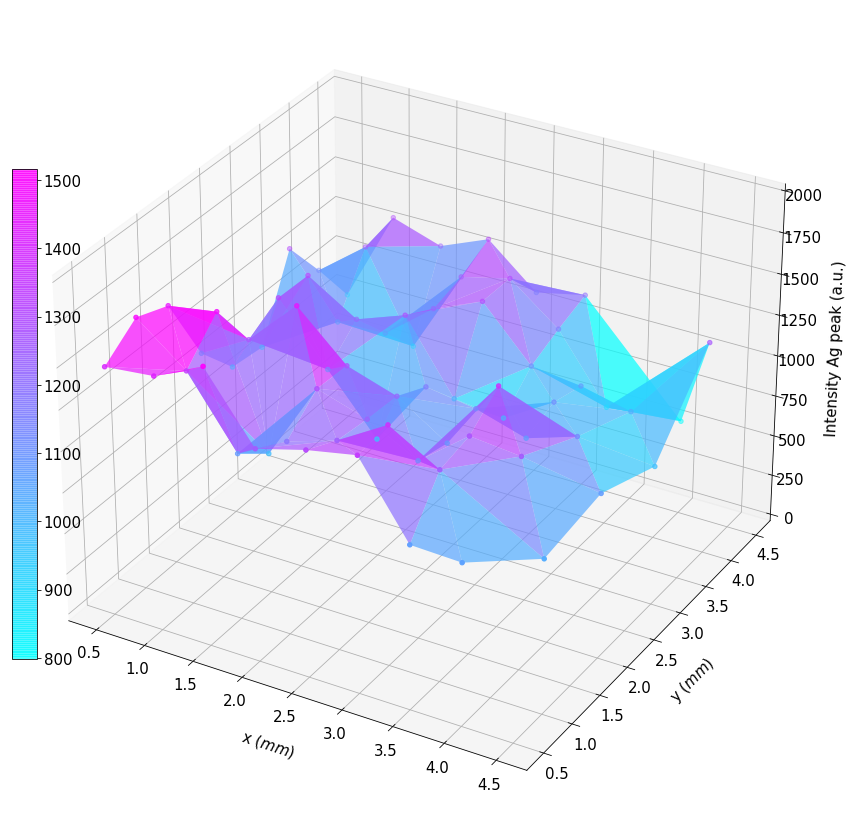

In [99]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

mappa=pd.read_csv('intensity.txt')
# Make data.
X = mappa.Xcoord*0.001
Y = mappa.Ycoord*0.001
Z = mappa.Intensity
# Plot the surface.
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
image=ax.plot_trisurf(X, Y, Z, cmap='cool', alpha=.7)

axins = inset_axes(ax,  
                   width="3%",# width = 5% of parent_bbox width
                   height="60%",
                  loc='center left') # height : 50%

cbar = fig.colorbar(image, cax=axins, orientation='vertical')
cbar.ax.tick_params(labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('x ($mm$)',labelpad=15, fontsize=15)
ax.set_ylabel('y ($mm$)',labelpad=15,fontsize=15)
ax.set_zlabel('Intensity Ag peak (a.u.)',labelpad=15,fontsize=15)
ax.set_zlim(0,2000)
ax.scatter(X, Y, Z, c=Z, cmap='cool')
plt.show()

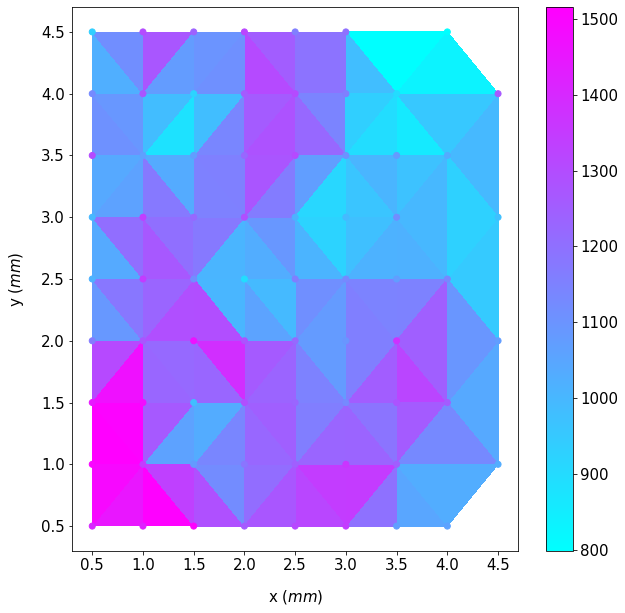

In [101]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
image = ax.tripcolor(X,Y,Z, cmap='cool')
cbar = fig.colorbar(image, orientation='vertical')
cbar.ax.tick_params(labelsize=15)
ax.set_xlabel('x ($mm$)',labelpad=15, fontsize=15)
ax.set_ylabel('y ($mm$)',labelpad=15,fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.scatter(X,Y, c=Z, cmap='cool')

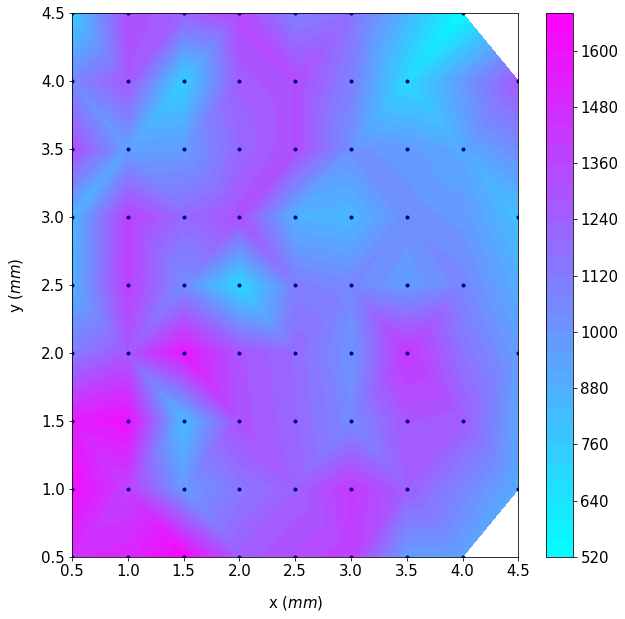

In [109]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
image = ax.tricontourf(X,Y,Z, 30, cmap='cool') # choose 20 contour levels, just to show how good its interpolation is
cbar = fig.colorbar(image, orientation='vertical')
cbar.ax.tick_params(labelsize=15)
ax.set_xlabel('x ($mm$)',labelpad=15, fontsize=15)
ax.set_ylabel('y ($mm$)',labelpad=15,fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.plot(X,Y, '.', color='navy')

(0.0, 2000.0)

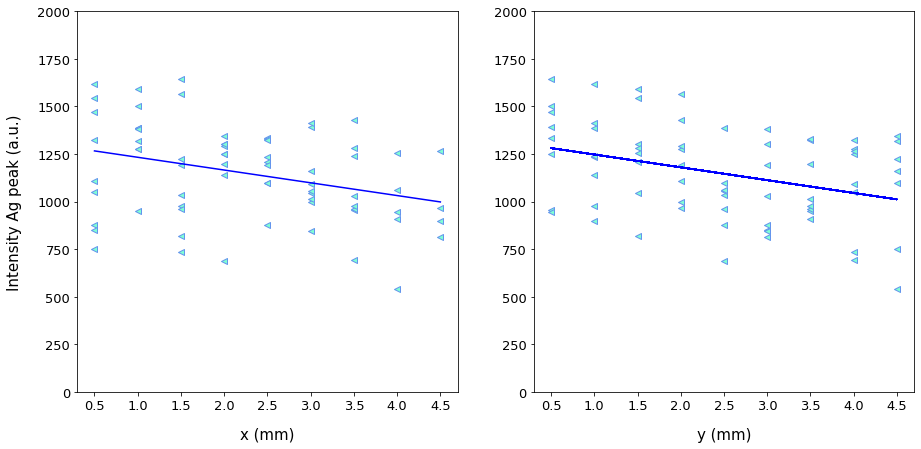

In [97]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))
ax1.scatter(X, Z, marker='<', color='aquamarine',edgecolor='cornflowerblue')
m1, b1 = np.polyfit(X, Z, 1)
ax1.plot(X, m1*X + b1, 'blue')
ax1.set_ylim(0,2000)
ax1.set_ylabel('Intensity Ag peak (a.u.)',labelpad=15, fontsize=15)
ax1.set_xlabel('x (mm)',labelpad=15, fontsize=15)
ax2.scatter(Y, Z, marker='<', color='aquamarine',edgecolor='cornflowerblue')
m2, b2 = np.polyfit(Y, Z, 1)
ax2.plot(Y, m2*Y + b2, 'blue')
ax2.set_xlabel('y (mm)',labelpad=15, fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.set_ylim(0,2000)

# Supplementary not useful

In [167]:
def gauss(x,sigma,mu,factor):
    return (factor*(1/(sigma*(2*np.pi)**.5))*np.exp(-(x-mu)**2/(2*sigma**2)))
L=[]

In [168]:
def lognormal(x,s):
    return np.exp(-np.log(x)**2/(2*s**2))/(s*x*(2*np.pi)**(1/2))

The mean value is 1148.0671830985918 the minimum value is 541.65 the maximum value is 1646.27
The gaussian parameters (𝜇 ± 𝜎) are: 1074.45 ± 285.88 



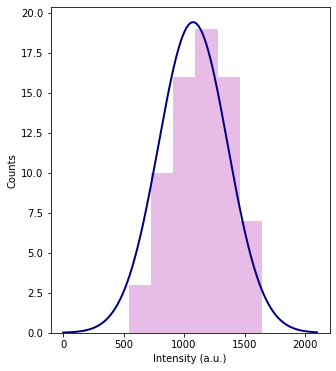

In [169]:
mappa=pd.read_csv('intensity.txt')
x = mappa.Intensity
print('The mean value is',x.mean(),'the minimum value is', x.min(),'the maximum value is', x.max())
counts, bis = np.histogram(x, bins=6)
step=bis[1]-bis[0]
x_fit = np.arange(0, 2100, 1) 
as_x = .5*(bis[1:]+bis[:-1])
fig= plt.figure(figsize=(5, 6))
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Counts')
plt.hist(x, bins=6, color='plum', alpha=0.7)
#plt.errorbar(as_x, counts, yerr=0, errorevery=1, fmt='^', color='deeppink')
params, covariance = optimize.curve_fit(gauss, bis[:-1], counts, p0=[400, 1200, 100])
plt.plot(x_fit, gauss(x_fit,*params), '-', color = 'navy', lw = 2, label = 'Gaussian fit')
print('The gaussian parameters (𝜇 ± 𝜎) are:', round(params[1],2),'±', round(params[0],2), '\n') 

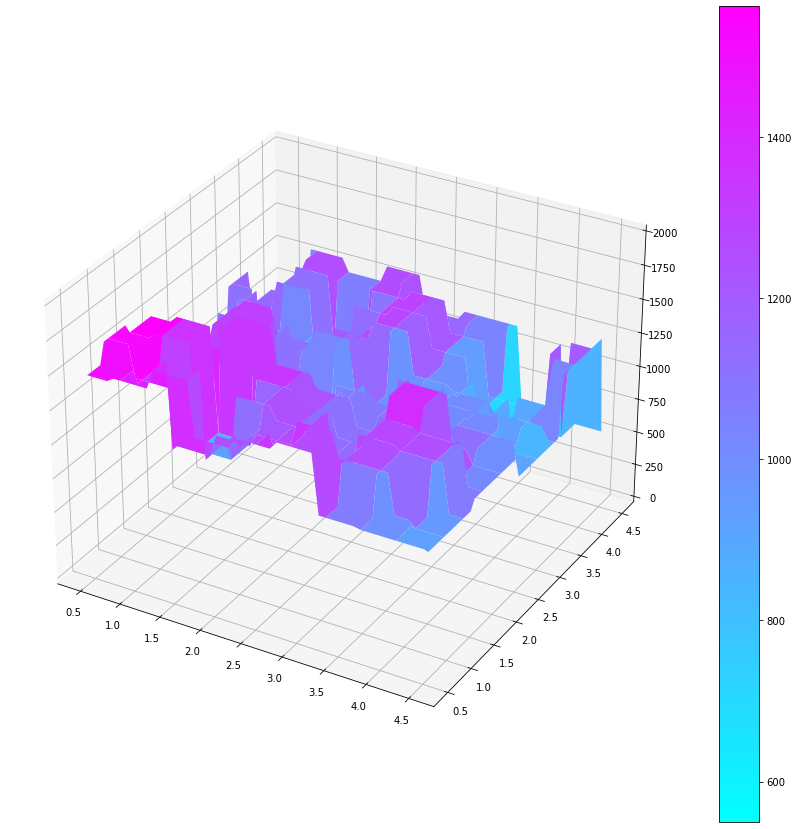

In [64]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

mappa=pd.read_csv('intensity.txt')
# Make data.
x = mappa.Xcoord*0.001
y = mappa.Ycoord*0.001
z = mappa.Intensity

xi = np.linspace(min(x), max(x))
yi = np.linspace(min(y), max(y))

X, Y = np.meshgrid(xi, yi)
Z = interpolate.griddata((x, y), z, (X.flatten(), Y.flatten()), 'nearest').reshape(50,50)

surf = ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap='cool',
                       linewidth=1, antialiased=True)

ax.set_zlim3d(0,2000)
fig.colorbar(surf)

plt.show()

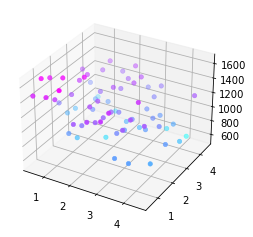

In [56]:
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='cool', linewidth=0.5);